# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import pickle
pd.set_option('display.max_columns', 500)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# with open('golden_data_dummy.pkl', 'rb') as d:
  #  df = pickle.load(d)

In [3]:
df = pd.read_pickle('golden_data_dummy.pkl')

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [4]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1

In [5]:
df['price']

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15913    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 14990, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


<AxesSubplot:>

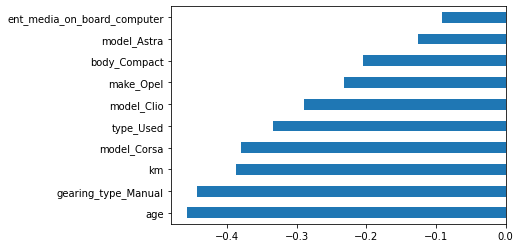

In [7]:
df.corr()['price'].sort_values().head(10).plot.barh()

<AxesSubplot:>

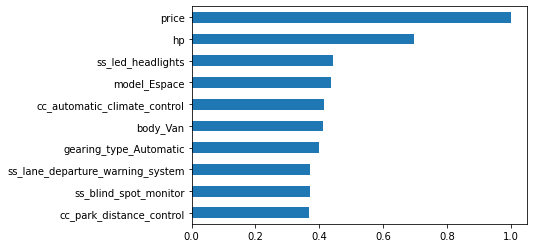

In [8]:
df.corr()['price'].sort_values().tail(10).plot.barh()

<AxesSubplot:ylabel='price'>

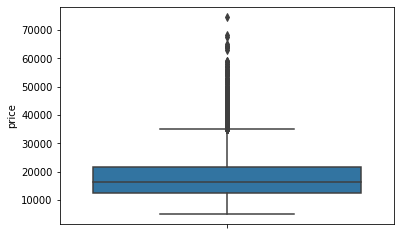

In [9]:
sns.boxplot(df['price'], orient = 'v')

<AxesSubplot:xlabel='price'>

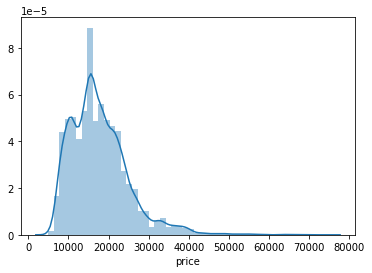

In [10]:
sns.distplot(df['price'])

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [11]:
X = df.drop('price', axis = 1)
y = df['price']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.intercept_

12863.60208058597

In [18]:
model.coef_

array([-1.07324683e+00,  1.00166983e+02, -3.66043273e-02, -4.31072316e+01,
       -2.11696074e+01,  2.90467232e+02,  1.47113286e+02, -4.26342916e+02,
       -2.45857390e+02,  1.44234756e+01, -2.93066855e+02, -1.16108907e+01,
       -1.62343964e+02, -2.49233364e+02,  3.14435352e+01, -8.25700143e+02,
       -1.68410690e+02, -6.39788701e+01, -2.52627947e+02, -3.36816275e+02,
       -2.21937795e+02,  6.50316165e+02,  7.88768070e+02,  5.31963200e+02,
        5.00522695e+02, -4.61395475e+02, -5.70148532e+02,  1.39061715e+02,
        1.34225323e+02,  2.11425107e+02,  1.86571437e+01, -4.13212783e+02,
        1.22899206e+02, -1.10716807e+02, -1.60110802e+03, -5.85909249e+02,
        1.44819775e+02,  9.04394102e+02, -7.91700474e+01, -8.95007277e+01,
        7.50148324e+00,  3.55613012e+02, -1.90184859e+02, -1.39196020e+03,
       -1.95752826e+02,  3.11567861e+02,  3.60531806e+01, -8.14980053e+01,
        3.51648412e+02,  3.35134852e+02, -4.18921989e+01,  2.67668171e+02,
       -2.30397964e+02,  

In [19]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient']).T

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
Coefficient,-1.073247,100.166983,-0.036604,-43.107232,-21.169607,290.467232,147.113286,-426.342916,-245.85739,14.423476,-293.066855,-11.610891,-162.343964,-249.233364,31.443535,-825.700143,-168.41069,-63.97887,-252.627947,-336.816275,-221.937795,650.316165,788.76807,531.9632,500.522695,-461.395475,-570.148532,139.061715,134.225323,211.425107,18.657144,-413.212783,122.899206,-110.716807,-1601.108021,-585.909249,144.819775,904.394102,-79.170047,-89.500728,7.501483,355.613012,-190.184859,-1391.960199,-195.752826,311.567861,36.053181,-81.498005,351.648412,335.134852,-41.892199,267.668171,-230.397964,81.038421,-1.006129e-11,49.783037,162.236253,296.949578,646.863104,2336.345415,334.576206,260.053009,200.760844,-605.056459,114.711425,144.745153,-82.990723,536.67836,143.670323,465.506024,-381.255039,623.62371,-5.921174,1016.649712,351.594795,-464.416826,-109.427478,-214.909446,27.997096,857.959262,-298.919712,-104.741336,1069.387925,160.633109,-943.039898,-239.934589,558.157183,-574.468461,196.748116,-251.756693,2915.843361,-2360.623718,-555.219643,-2171.258195,5990.363399,-903.261843,-1000.956439,-4267.960172,-2410.302178,3712.740529,1050.634899,-111.875272,2368.722961,-219.469285,-399.294425,-779.360713,-164.966108,-40.408266,-1385.999006,732.650114,32.304028,608.033389,553.577952,-151.291141,-13.351529,512.159508,675.167285,-2795.44089,269.134974,372.387701,-1474.120944,754.436949,657.002718,-259.742686,-1845.795225,2105.537911,1338.32729,-2574.4

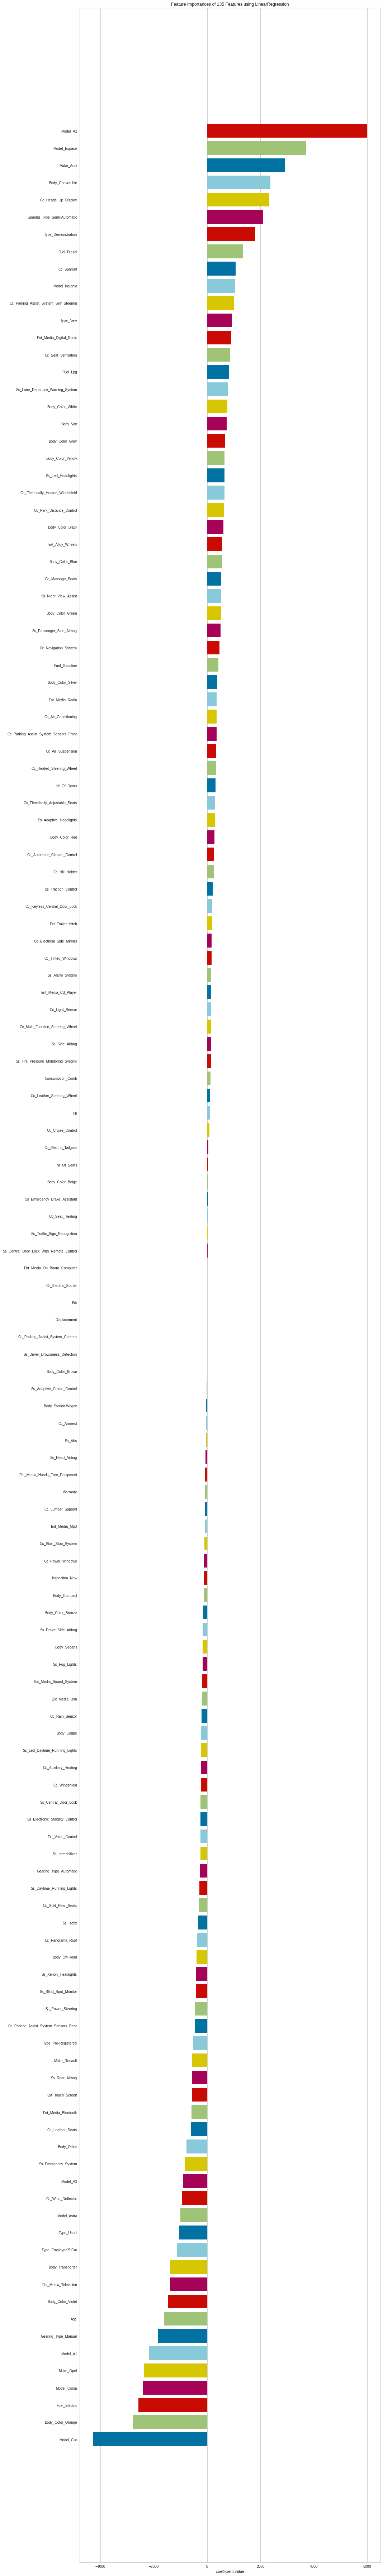

<AxesSubplot:title={'center':'Feature Importances of 135 Features using LinearRegression'}, xlabel='coefficient value'>

In [20]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [21]:
y_pred = model.predict(X_test)

In [22]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [23]:
eval_metrics(y_test, y_pred)  

r2_score: 0.8917673810997073 
 mae: 1672.3867626670617 
 mse: 5481554.52431188 
 rmse: 2341.2719885378287


In [24]:
model.score(X_train, y_train)

0.8911406059629983

In [25]:
model.score(X_test, y_test)

0.8917673810997073

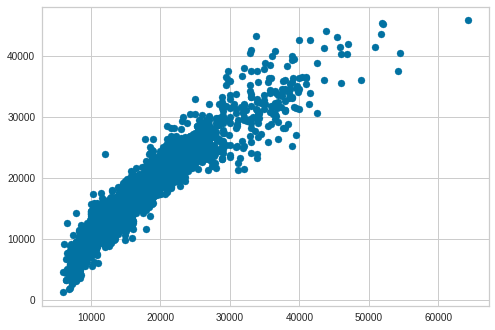

In [26]:
plt.scatter(y_test, y_pred)

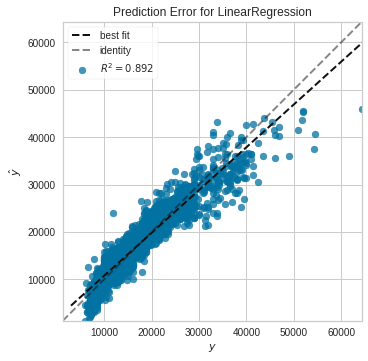

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [27]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

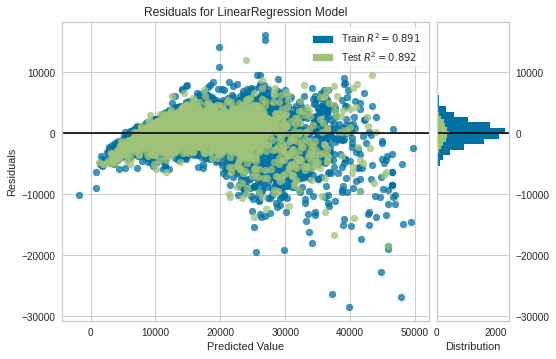

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [28]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [29]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [30]:
compare.sample(10)

,Actual,Pred
8936,7950,4591.686120
9391,8990,9679.058280
8474,11190,9602.838958
872,20900,19828.222177
10790,10990,15225.073753
3046,15500,12992.258995
10030,15880,15851.733961
315,15090,15712.145902
11535,16480,16582.063406
7121,18900,17868.419450


In [31]:
comparison = {"Actual": y_test, "Model prediction": y_pred, "Diff": y_pred-y_test, 
              "Diff %": 100*(y_pred-y_test)/y_test}

In [32]:
comparison_df = pd.DataFrame(comparison).round(1)

In [33]:
comparison_df.sort_values('Diff', ascending=True).head(20)

,Actual,Model prediction,Diff,Diff %
15828,64332,45849.3,-18482.7,-28.7
15816,54205,37537.1,-16667.9,-30.7
15813,54500,40565.1,-13934.9,-25.6
12450,38900,25196.2,-13703.8,-35.2
15873,48900,36082.4,-12817.6,-26.2
12767,39450,27041.8,-12408.2,-31.5
12761,42475,30623.1,-11851.9,-27.9
12546,33899,23314.9,-10584.1,-31.2
12506,36900,26382.5,-10517.5,-28.5
12870,31990,21532.2,-10457.8,-32.7


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8857213142604454

In [36]:
accuraries

array([0.89934535, 0.8662727 , 0.88194013, 0.87955785, 0.89529942,
       0.88721162, 0.87829021, 0.88528645, 0.89981669, 0.88419272])

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [37]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# from sklearn.preprocessing import StandardScaler

In [38]:
ridge_model = Ridge(normalize = True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

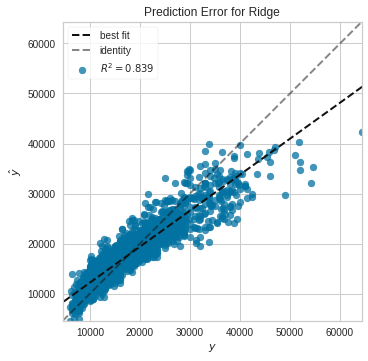

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [39]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(ridge_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [40]:
eval_metrics(y_test, y_pred) 

r2_score: 0.8390485500575233 
 mae: 1963.3528962238252 
 mse: 8151555.026488914 
 rmse: 2855.0928227448076


In [41]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)   # cross-validation
accuraries.mean()

0.8245510954429456

In [42]:
ridge_model.alpha

1.0

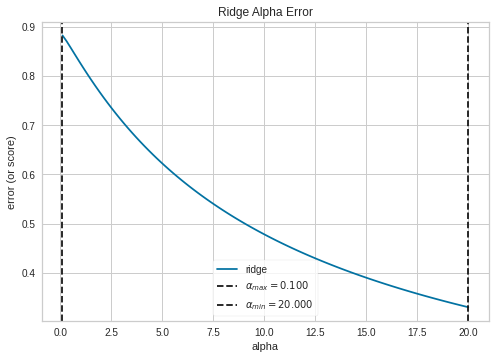

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [43]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [44]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8908685496674181 
 mae: 1663.8811495596708 
 mse: 5527076.785108298 
 rmse: 2350.973582392686


In [45]:
ridgecv = RidgeCV(alphas=alpha_space, cv=5, normalize = True)               # finding best alpha with cv
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, normalize=True)

In [46]:
ridgecv.alpha_            

0.1

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [47]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [48]:
lasso_model = Lasso(normalize = True)                           
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8840377602740636 
 mae: 1698.8273169126865 
 mse: 5873029.279690901 
 rmse: 2423.4333660513344


In [49]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=5)   # cross-validation
accuraries.mean()

0.8800530673769652

In [50]:
lasso_model.alpha

1.0

In [51]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize = True, cv = 5).fit(X_train, y_train)

In [52]:
lasso_cv_model.alpha_

0.1

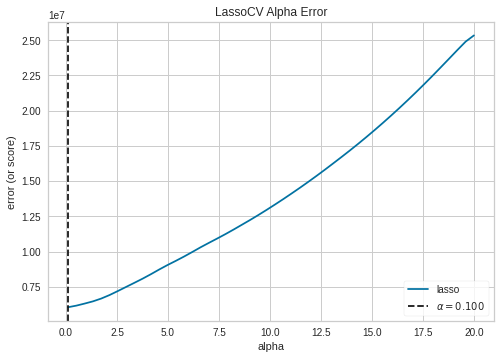

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [53]:
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 50)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize = True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [54]:
lasso_model = Lasso(lasso_cv_model.alpha_, normalize = True)                             
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8917796626649902 
 mae: 1668.1568590125219 
 mse: 5480932.511554302 
 rmse: 2341.1391482682743


In [55]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=5)   # cross-validation
accuraries.mean()

0.8855150613683828

In [56]:
# create features DataFrame

feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [57]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

113

In [58]:
lasso_model = Lasso(4, normalize = True)                             
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8412279554169774 
 mae: 1949.3757208234101 
 mse: 8041176.755780799 
 rmse: 2835.69687304211


In [59]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

21

In [60]:
significant_features.sort_values(by = 'coef', ascending = False)

,features,coef
99,model_Espace,5024.948979
90,make_Audi,3122.714982
59,cc_heads_up_display,1745.305942
130,type_Demonstration,1189.002614
21,ss_led_headlights,649.114797
79,cc_seat_ventilation,501.654242
95,model_A3,461.321951
51,cc_automatic_climate_control,441.441368
73,cc_parking_assist_system_self_steering,333.311600
109,body_Van,253.985099


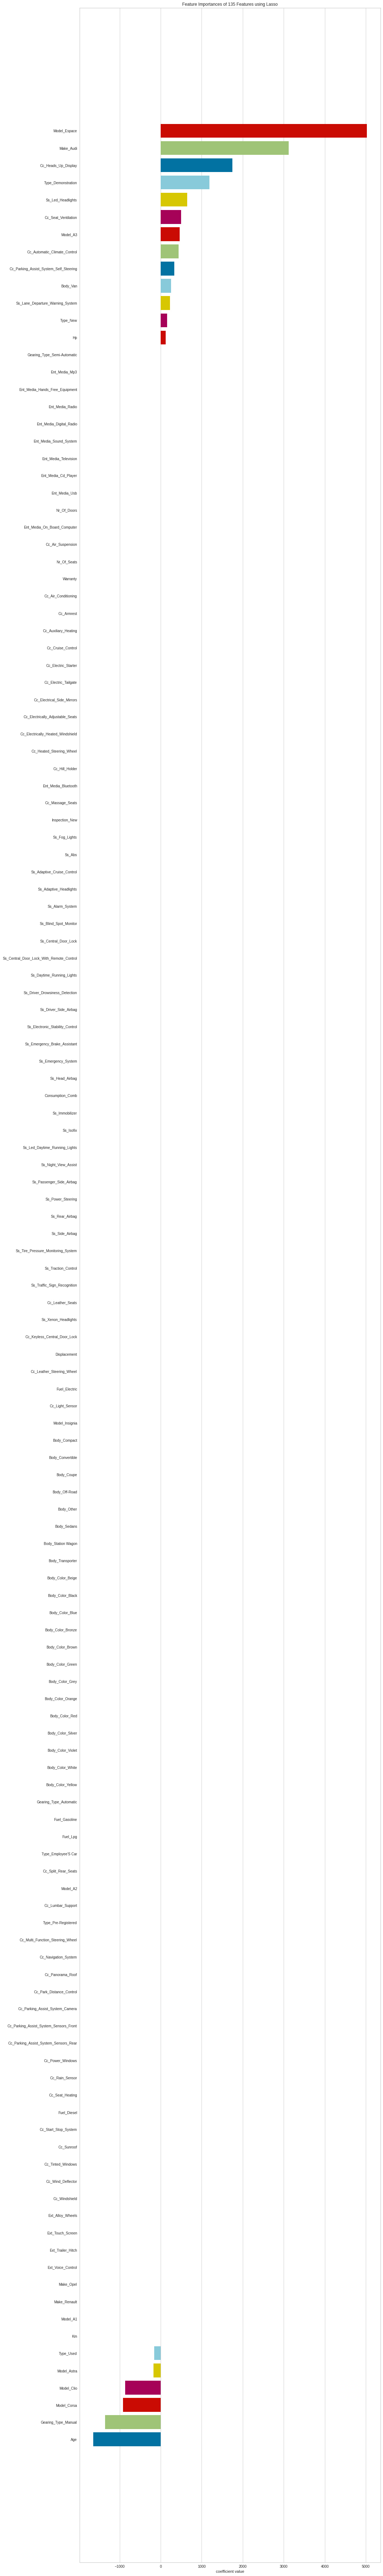

<AxesSubplot:title={'center':'Feature Importances of 135 Features using Lasso'}, xlabel='coefficient value'>

In [61]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
visualizer = RadViz(size=(1080, 7200))
viz.show()